# collecting data from cvs files from 2020-01 to 2020-12
the api didnt work 

In [4]:
#varblies
import csv
import json
import pandas as pd
import requests
import re 
import numpy as np
import matplotlib.pyplot as plt
import folium
from pandas.io.json import json_normalize
import urllib
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
from sklearn import datasets
import geopandas as gpd
import time
import webbrowser
from shapely.geometry import point
from geopandas import GeoDataFrame
import plotly.express as px
import shapely.geometry
import warnings
from shapely.errors import ShapelyDeprecationWarning
warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning) 
import scipy
import scipy.stats as stats
import seaborn as sns
from scipy import stats


In [5]:
#importing the cvs file and splititng the locations and code 
police_data_path = "/Users/tamanikaid/Desktop/Project/police_data.csv"
police_data = pd.read_csv(police_data_path)

Police_data_df = pd.DataFrame(police_data)

Police_data_df[['city', 'code']] = Police_data_df['LSOA_name'].str.split(' ', n=1, expand=True)

#clean the table 
month = Police_data_df['Month']
Crime_type = Police_data_df ['Crime_type']
outcome_status = Police_data_df ['Last_outcome_category']
Latitude = Police_data_df['Latitude']
Longitude = Police_data_df ['Longitude']
Locations = Police_data_df ['Location']
City = Police_data_df ['city']

police_table_df = pd.DataFrame({"Month" : month, "Crime_type" : Crime_type,
                                "Locations": Locations, "Latitude" : Latitude,
                                "Longitude" : Longitude, "outcome_status": outcome_status,"City": City })

police_table_df

,Month,Crime_type,Locations,Latitude,Longitude,outcome_status,City
0,2020-01,Anti-social behaviour,On or near Chelsea Drive,52.597265,-1.841944,NaN,Birmingham
1,2020-01,Criminal damage and arson,On or near Byron Court,52.597809,-1.839063,Investigation complete; no suspect identified,Birmingham
2,2020-01,Other theft,On or near Clarence Road,52.594588,-1.843740,Investigation complete; no suspect identified,Birmingham
3,2020-01,Public order,On or near Badgers Bank Road,52.598270,-1.840641,Unable to prosecute suspect,Birmingham
4,2020-01,Public order,On or near Chelsea Drive,52.597265,-1.841944,Unable to prosecute suspect,Birmingham
...,...,...,...,...,...,...,...
306870,2020-12,Violence and sexual offences,On or near Maxwell Road,52.578475,-2.120286,Status update unavailable,Wolverhampton
306871,2020-12,Violence and sexual offences,On or near Parking Area,52.581482,-2.124530,Status update unavailable,Wolverhampton
306872,2020-12,Violence and sexual offences,On or near Commercial Road,52.582031,-2.115234,Investigation complete; no suspect identified,Wolverhampton
306873,2020-12,Violence and sexual offences,On or near Bath Street,52.582702,-2.118379,Status update unavailable,Wolverhampton


In [6]:
# the number of crimes in the west midlands from 2020-01 to 2022-05 in the west midlands 
Number_of_crime= len(Police_data_df["Crime_type"])
Number_of_crime

306875

In [7]:
# the number of crimes in the west midlands from 2020-01 to 2022-05 in the west midlands catergery by citys (remoeving out any citys that have vaule under 100)
crime_count_by_city_WOF = police_table_df["City"].value_counts()
crime_count_by_city = police_table_df.loc[police_table_df['City'].isin(crime_count_by_city_WOF.index[crime_count_by_city_WOF > 100])]
crime_count_by_city

,Month,Crime_type,Locations,Latitude,Longitude,outcome_status,City
0,2020-01,Anti-social behaviour,On or near Chelsea Drive,52.597265,-1.841944,NaN,Birmingham
1,2020-01,Criminal damage and arson,On or near Byron Court,52.597809,-1.839063,Investigation complete; no suspect identified,Birmingham
2,2020-01,Other theft,On or near Clarence Road,52.594588,-1.843740,Investigation complete; no suspect identified,Birmingham
3,2020-01,Public order,On or near Badgers Bank Road,52.598270,-1.840641,Unable to prosecute suspect,Birmingham
4,2020-01,Public order,On or near Chelsea Drive,52.597265,-1.841944,Unable to prosecute suspect,Birmingham
...,...,...,...,...,...,...,...
306869,2020-12,Violence and sexual offences,On or near Raby Street,52.579506,-2.122842,Status update unavailable,Wolverhampton
306870,2020-12,Violence and sexual offences,On or near Maxwell Road,52.578475,-2.120286,Status update unavailable,Wolverhampton
306871,2020-12,Violence and sexual offences,On or near Parking Area,52.581482,-2.124530,Status update unavailable,Wolverhampton
306872,2020-12,Violence and sexual offences,On or near Commercial Road,52.582031,-2.115234,Investigation complete; no suspect identified,Wolverhampton


In [8]:
# the number of crimes in the west midlands from 2020-01 to 2022-05 in the west midlands catergery by outcome_staues 
crime_city_location  = crime_count_by_city["City"].value_counts()
crime_city_location

Birmingham       134264
Sandwell          34707
Coventry          33787
Wolverhampton     29829
Walsall           28713
Dudley            27305
Solihull          17398
Name: City, dtype: int64

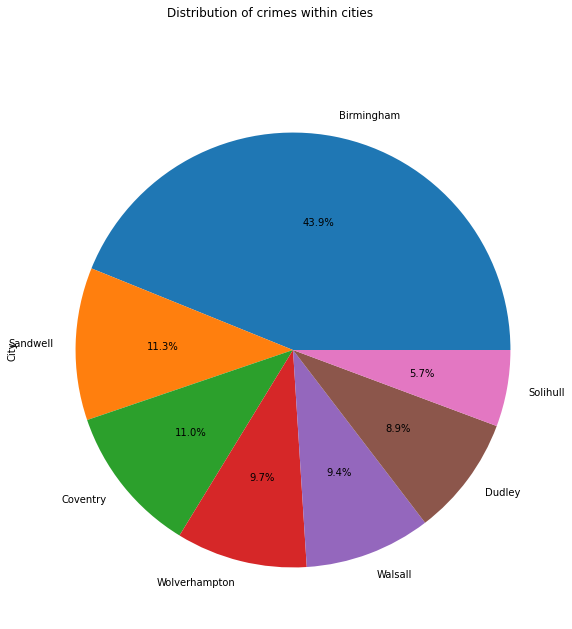

In [9]:
#creating a pie chart with citys 
crime_city_location.plot(kind='pie', figsize=(25,10), y= "City", 
                         title = "Distribution of crimes within cities",
                         subplots=True, startangle=0, autopct="%1.1f%%")
crime_city_location.plot

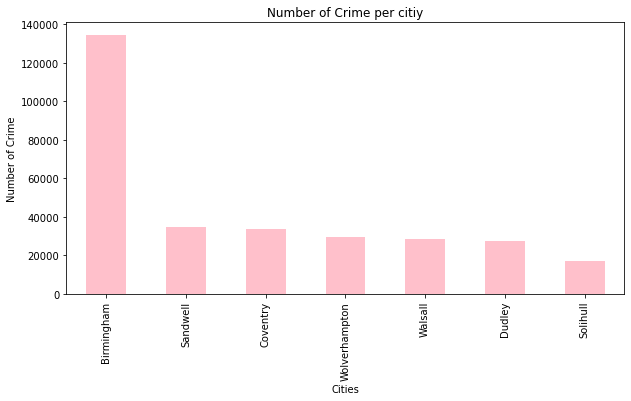

In [10]:
plot_outcome = crime_city_location.plot.bar(figsize=(10,5) , color = 'pink')  
plt.xlabel("Cities")
plt.ylabel("Number of Crime")
plt.title("Number of Crime per citiy")
plt.show()

In [11]:
# the number of crimes in the west midlands from 2020-01 to 2022-05 in the west midlands catergery by outcome_staues 
crime_outcome = police_table_df["outcome_status"].value_counts()
crime_outcome

Investigation complete; no suspect identified          119658
Unable to prosecute suspect                             95678
Status update unavailable                               26938
Court result unavailable                                15996
Action to be taken by another organisation               3596
Local resolution                                         2471
Offender given a caution                                 1868
Offender given a drugs possession warning                 606
Formal action is not in the public interest               600
Further investigation is not in the public interest       318
Awaiting court outcome                                    248
Offender given penalty notice                              67
Suspect charged as part of another case                    45
Further action is not in the public interest                4
Name: outcome_status, dtype: int64

In [12]:
#grouping data by locations and crime type 
group_data_crime_by_locations = police_table_df.groupby(['Crime_type']).Locations.value_counts()
group_data_crime_by_locations 

Crime_type                    Locations                        
Anti-social behaviour         On or near Parking Area              998
                              On or near Sports/Recreation Area    862
                              On or near Supermarket               717
                              On or near Petrol Station            602
                              On or near Shopping Area             547
                                                                  ... 
Violence and sexual offences  On or near Yatesbury Avenue            1
                              On or near Yewdale Crescent            1
                              On or near York Drive                  1
                              On or near York Mews                   1
                              On or near Yorkminster Drive           1
Name: Locations, Length: 80304, dtype: int64

In [13]:
#grouping data by citys and crime type 
group_data_crime_by_City = crime_count_by_city.groupby(['Crime_type']).City.value_counts()
group_data_crime_by_City

Crime_type                    City         
Anti-social behaviour         Birmingham       16544
                              Sandwell          4484
                              Coventry          4345
                              Walsall           3986
                              Dudley            3817
                                               ...  
Violence and sexual offences  Coventry         13187
                              Wolverhampton    12565
                              Walsall          11130
                              Dudley           10443
                              Solihull          6007
Name: City, Length: 98, dtype: int64

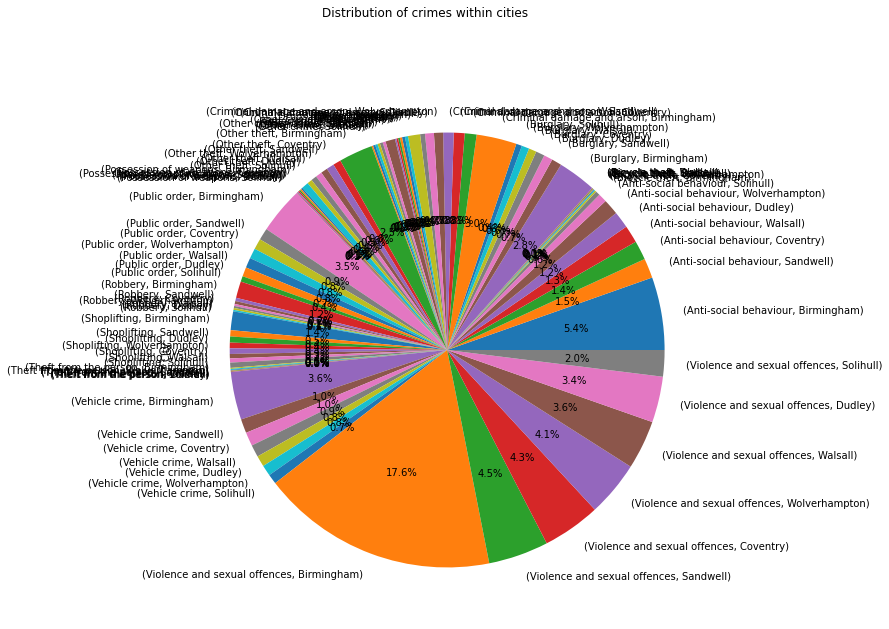

In [14]:
#creating a pie chart with citys 
group_data_crime_by_City.plot(kind='pie', figsize=(25,10), y= "City", 
                         title = "Distribution of crimes within cities",
                         subplots=True, startangle=0, autopct="%1.1f%%")
group_data_crime_by_City.plot

In [15]:
# Create a grouped bar plot for city and crime_type 
city_crime_grouped = crime_count_by_city.groupby(['City']).Crime_type.value_counts().unstack()
city_crime_grouped

Crime_type,Anti-social behaviour,Bicycle theft,Burglary,Criminal damage and arson,Drugs,Other crime,Other theft,Possession of weapons,Public order,Robbery,Shoplifting,Theft from the person,Vehicle crime,Violence and sexual offences
City,,,,,,,,,,,,,,
Birmingham,16544,1003,8716,9137,2753,2175,7720,1574,10630,3776,4250,1191,10884,53911
Coventry,4345,368,1992,2690,662,672,1784,371,2427,667,1276,221,3125,13187
Dudley,3817,96,2008,2012,380,521,1297,232,2102,438,1369,102,2488,10443
Sandwell,4484,197,2281,2458,685,656,1752,299,2702,741,1427,166,3191,13668
Solihull,1984,161,1318,1103,333,329,1124,165,1265,338,943,95,2233,6007
Walsall,3986,161,1742,2379,419,549,1442,286,2296,455,995,105,2768,11130
Wolverhampton,3573,229,1726,2078,506,573,1507,320,2318,462,1283,235,2454,12565


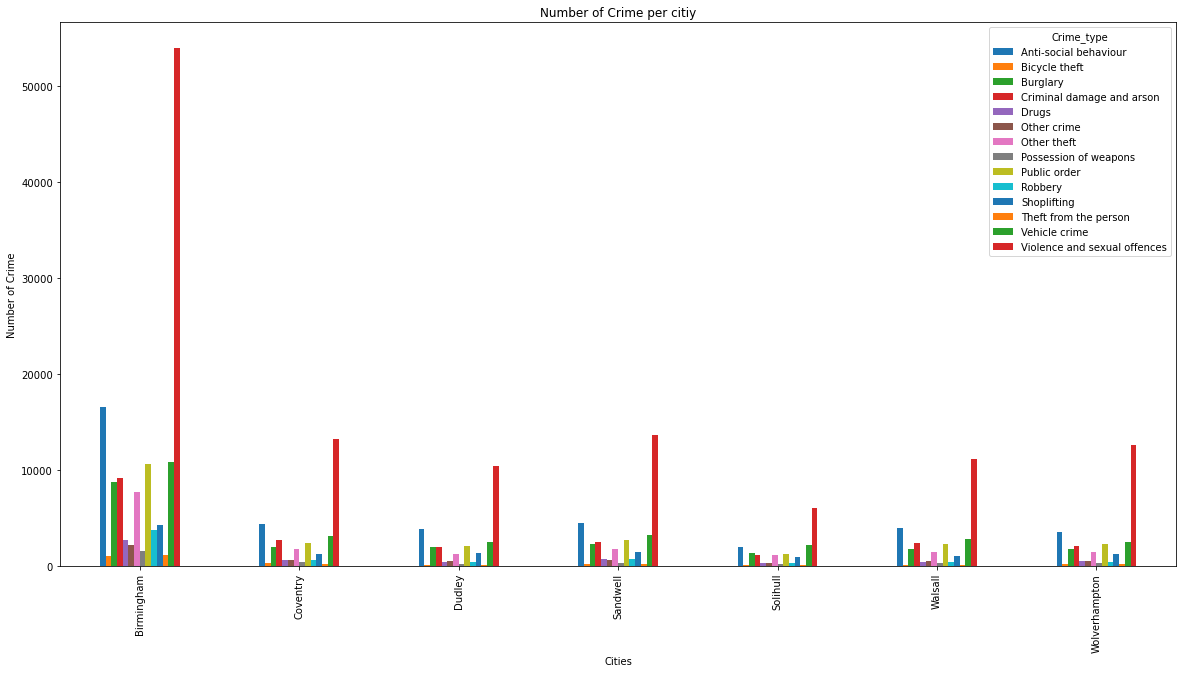

In [16]:
#creating the grouped bar chart 
plot_outcome = city_crime_grouped.plot.bar(figsize=(20,10))  
plt.xlabel("Cities")
plt.ylabel("Number of Crime")
plt.title("Number of Crime per citiy")
plt.show()

In [17]:
# Create a grouped bar plot for city and crime_type 
locations_crime_grouped = crime_count_by_city.groupby(['Locations']).Crime_type.value_counts().unstack()
locations_crime_grouped

Crime_type,Anti-social behaviour,Bicycle theft,Burglary,Criminal damage and arson,Drugs,Other crime,Other theft,Possession of weapons,Public order,Robbery,Shoplifting,Theft from the person,Vehicle crime,Violence and sexual offences
Locations,,,,,,,,,,,,,,
On or near A38,4.0,NaN,1.0,3.0,NaN,NaN,2.0,NaN,4.0,2.0,2.0,NaN,NaN,9.0
On or near A38(M),1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
On or near A4031,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
On or near A4034,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
On or near A4036,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
On or near Yoxall Grove,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,5.0
On or near Yoxall Road,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,5.0
On or near Yule Road,1.0,NaN,1.0,4.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,8.0


In [ ]:
my_maps = folium.Map(
    location = [52.46705703179184, -1.7719295917681033],
    zoom_start = 11
)

for _, crime in Police_data_df.iterrows():
     folium.Marker(
        location = [crime['Latitude'], crime['Longitude']],
        popup = crime ['Crime_type'],
         tooltip = crime ['Crime_type'],
         icon = folium.Icon(color = 'pink', preflix = 'fa', icon = 'circle')
     ).add_to(my_maps)

my_maps.save(outfile= "crime_maps.html")


# summary 

From the data I have analysed – In 2020 there were 306,875 crimes in the west midlands alone, and around a 43.8% has occurred in Birmingham with the highest level of crime of 134,264.


with Sandwell at 34,707
Coventry at 33,787
Wolverhampton at 29,829
and Walsall at 28,713

This indicate that Birmingham can be the dangers city in the west midlands, however this can’t be confirmed with only this date, since there are other factors like populations, money/budget, city size, etc this is what my teammate are looking into. 

However, Birmingham has got the highest value in all crime type lime violence, theft, robbery, etc this is an inductor that the Birmingham may actual be a dangerous place to, no matter the factors.

On the other scale, we there are few citys that have only re

from my data I can say that the most dangerous area and where the most frequented crime does occur are next to

On or near Parking Area         at      7,179
On or near Shopping Area        at      6,783
On or near Supermarket          at      6,735
On or near Petrol Station       at      6,113
On or near Sports/Recreation Area   at 5,019

This means that the most dangerous area to around be parking aera.

# T-test

Null Hypothesis - is there significant difference between the Violence and sexual offences crime in birmingham

In [15]:
police_table_df

,Month,Crime_type,Locations,Latitude,Longitude,outcome_status,City
0,2020-01,Anti-social behaviour,On or near Chelsea Drive,52.597265,-1.841944,NaN,Birmingham
1,2020-01,Criminal damage and arson,On or near Byron Court,52.597809,-1.839063,Investigation complete; no suspect identified,Birmingham
2,2020-01,Other theft,On or near Clarence Road,52.594588,-1.843740,Investigation complete; no suspect identified,Birmingham
3,2020-01,Public order,On or near Badgers Bank Road,52.598270,-1.840641,Unable to prosecute suspect,Birmingham
4,2020-01,Public order,On or near Chelsea Drive,52.597265,-1.841944,Unable to prosecute suspect,Birmingham
...,...,...,...,...,...,...,...
306870,2020-12,Violence and sexual offences,On or near Maxwell Road,52.578475,-2.120286,Status update unavailable,Wolverhampton
306871,2020-12,Violence and sexual offences,On or near Parking Area,52.581482,-2.124530,Status update unavailable,Wolverhampton
306872,2020-12,Violence and sexual offences,On or near Commercial Road,52.582031,-2.115234,Investigation complete; no suspect identified,Wolverhampton
306873,2020-12,Violence and sexual offences,On or near Bath Street,52.582702,-2.118379,Status update unavailable,Wolverhampton


In [16]:
myCrime = police_table_df['Crime_type']
myCity = police_table_df['City']

In [17]:
myCrime.value_counts()

Violence and sexual offences    121221
Anti-social behaviour            38782
Vehicle crime                    27246
Public order                     23824
Criminal damage and arson        21913
Burglary                         19823
Other theft                      16707
Shoplifting                      11595
Robbery                           6904
Drugs                             5757
Other crime                       5491
Possession of weapons             3257
Bicycle theft                     2226
Theft from the person             2129
Name: Crime_type, dtype: int64

In [18]:
myCity.value_counts()

Birmingham       134264
Sandwell          34707
Coventry          33787
Wolverhampton     29829
Walsall           28713
                  ...  
Cheltenham            1
Gwynedd               1
Worthing              1
Kirklees              1
Leeds                 1
Name: City, Length: 79, dtype: int64

In [20]:
myCategory1 = myCrime == 'Violence and sexual offences'
myCategory2 = myCity == 'Birmingham'

myCategory1.head()

0    False
1    False
2    False
3    False
4    False
Name: Crime_type, dtype: bool

In [21]:
myResult1 = myCity[myCategory1].dropna 
myResult2 = myCity[myCategory2].dropna 

In [22]:
from scipy.stats import ttest_ind

In [23]:
ttest_ind(myCategory1, myCategory2)

Ttest_indResult(statistic=-33.80583046001903, pvalue=2.7570602905855178e-250)

# Summary 

above - 0.05 
- Not significant - We dont reject the Null Hypothesis. 
-- the crime in birmingham of violence is not by chances